# Machine Learning Algorithm on Brest Cancer Dataset



Breast cancer classification refers to the process of using machine learning algorithms to predict whether a breast tissue mass is malignant (cancerous) or benign (non-cancerous) based on various features derived from medical imaging data, such as mammograms or biopsies. This classification is a critical aspect of medical diagnosis, aiding doctors in making informed decisions about patient treatment and care.

Machine learning models are trained using historical data, where the features representing characteristics of the breast mass (such as size, shape, and texture) are associated with their corresponding diagnostic outcomes (malignant or benign). These models learn patterns from the training data and can then predict the likelihood of new, unseen cases being cancerous or non-cancerous.

Accurate breast cancer classification can significantly improve early detection rates and patient outcomes. It reduces the need for unnecessary invasive procedures in cases of benign masses and ensures that malignant cases are identified promptly, leading to timely medical interventions and potentially life-saving treatments.



* Random Forest Classifier
* Support Vector Classifier
* Logistic Regression
* Decision Tree Classifier

To check which has the best Accuracy Scores

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
data = pd.read_csv('data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Exploratory Data Analysis 

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data = data.set_index('id')
data.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
data.shape

(569, 31)

# Data Visualization

Number of Benign:  212
Number of Malignant :  357
Percentage of Benign:  37.258347978910365
Number of Malignant :  62.741652021089635


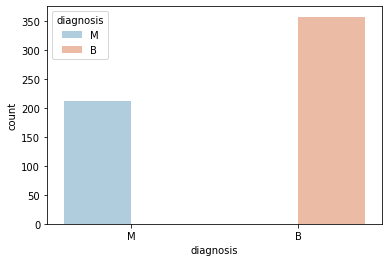

In [10]:
sns.countplot(x='diagnosis',hue='diagnosis',data=data, palette='RdBu_r')
M, B = data.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
print('Percentage of Benign: ',B/(B+M)*100)
print('Number of Malignant : ',M/(B+M)*100)

<AxesSubplot:>

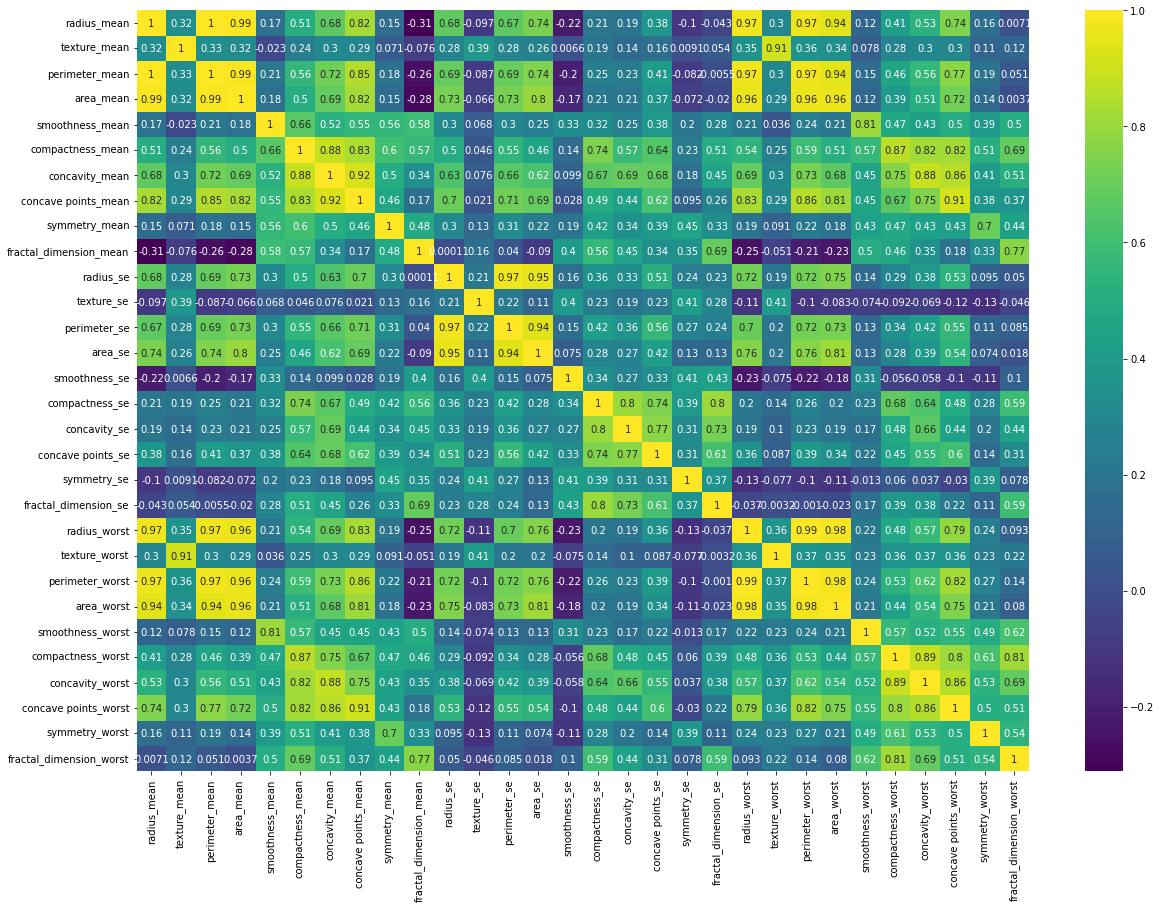

In [11]:
figsize = plt.figure(figsize=(20,14))
sns.heatmap(data.corr(),annot=True,cmap='viridis')


In [12]:
columns = list(data.columns)
categorical_features = []
numerical_features = []

for col in columns:
    if (col != 'diagnosis'):
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


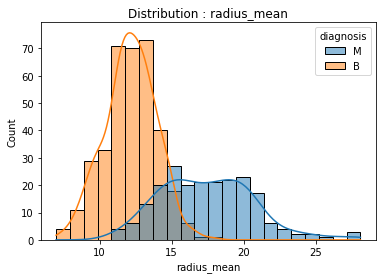

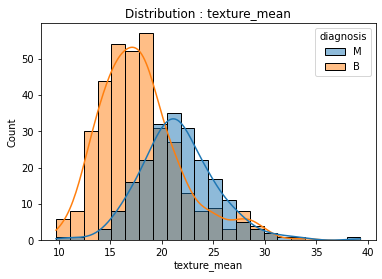

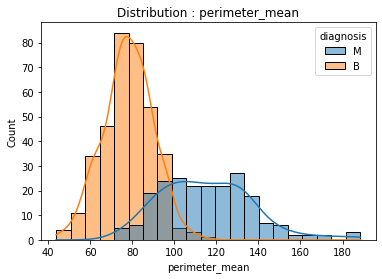

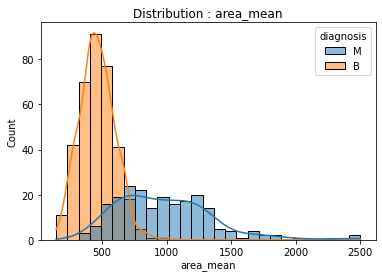

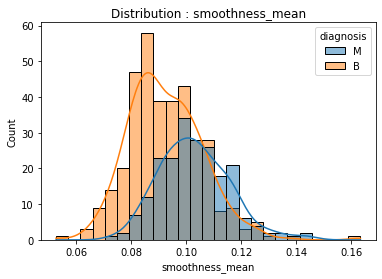

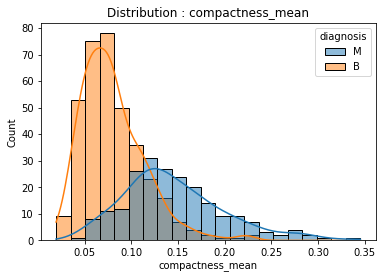

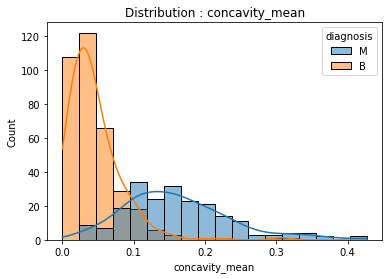

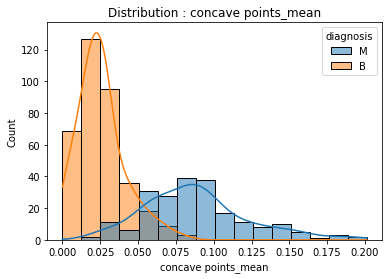

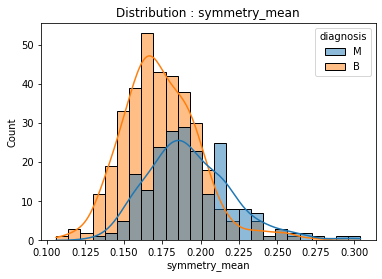

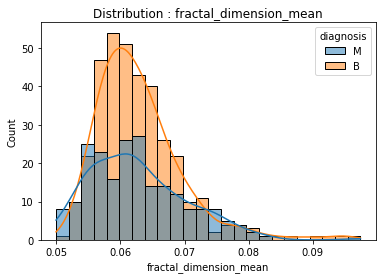

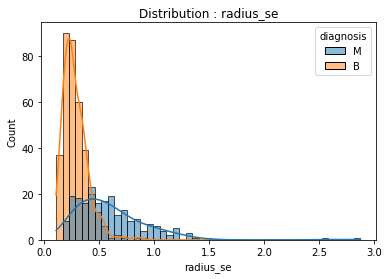

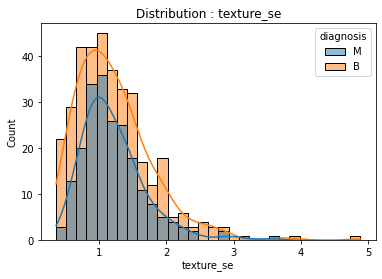

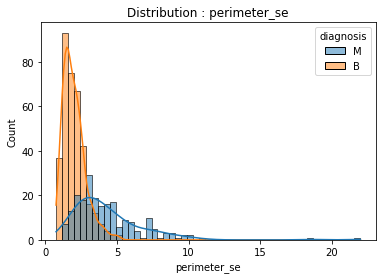

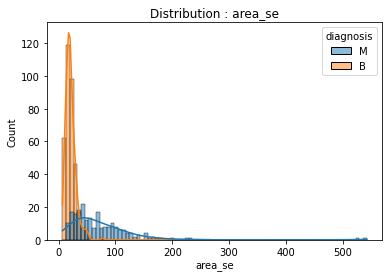

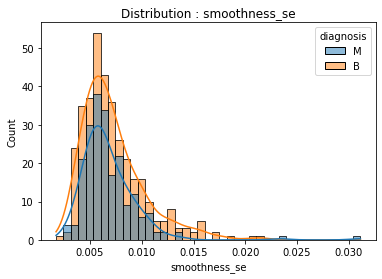

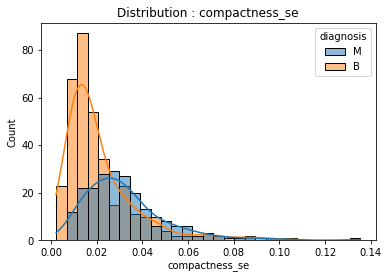

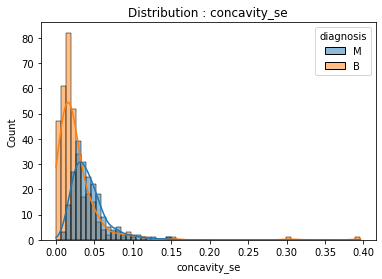

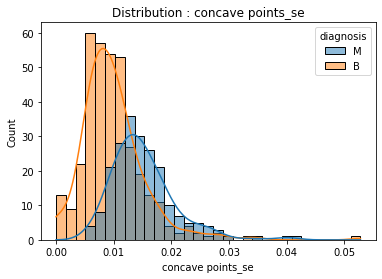

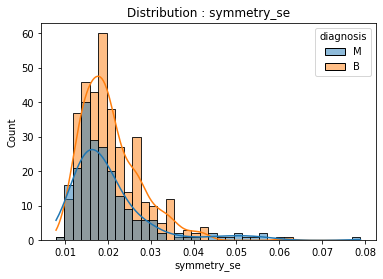

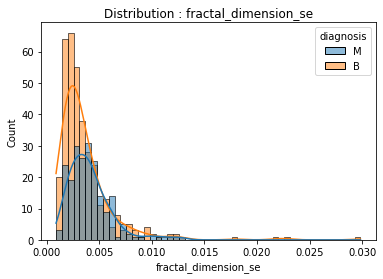

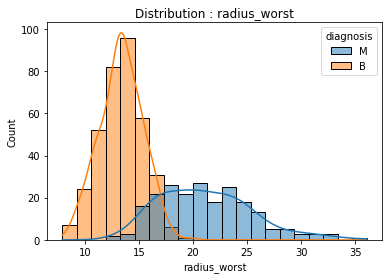

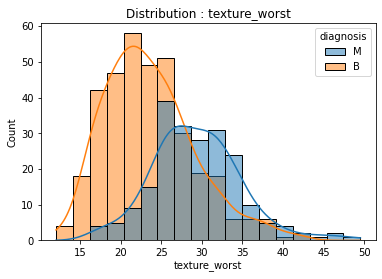

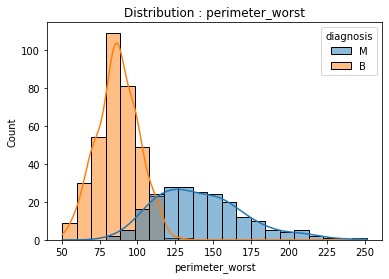

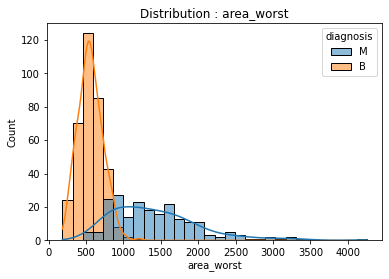

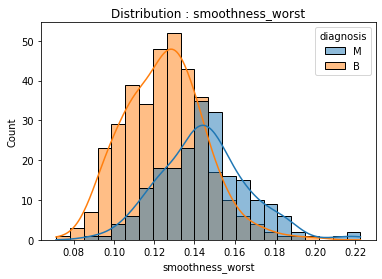

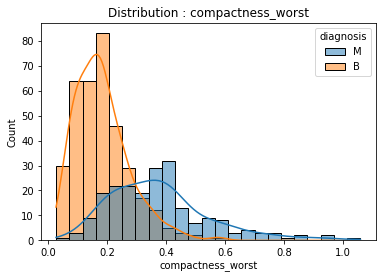

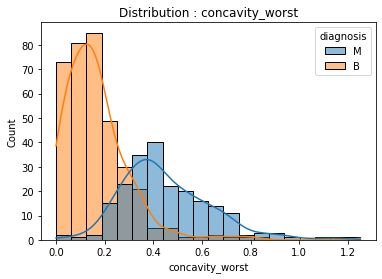

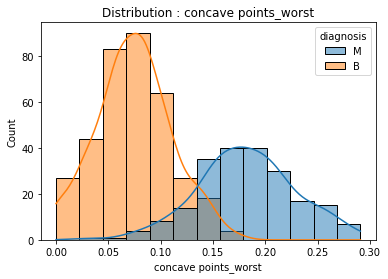

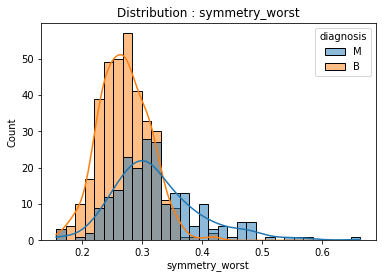

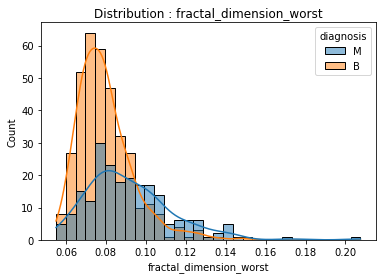

In [13]:

for col in numerical_features:
    sns.histplot(data = data, x=col, kde = True,hue = 'diagnosis')
    title = 'Distribution : ' + col
    plt.title(title)
    plt.show()

In [14]:
def plot_feat1_feat2(feat1, feat2):
    sns.scatterplot(x= feat1, y = feat2, hue="diagnosis",data= data)
    plt.title(feat1 +' VS '+ feat2)


## Positive Corelated Features

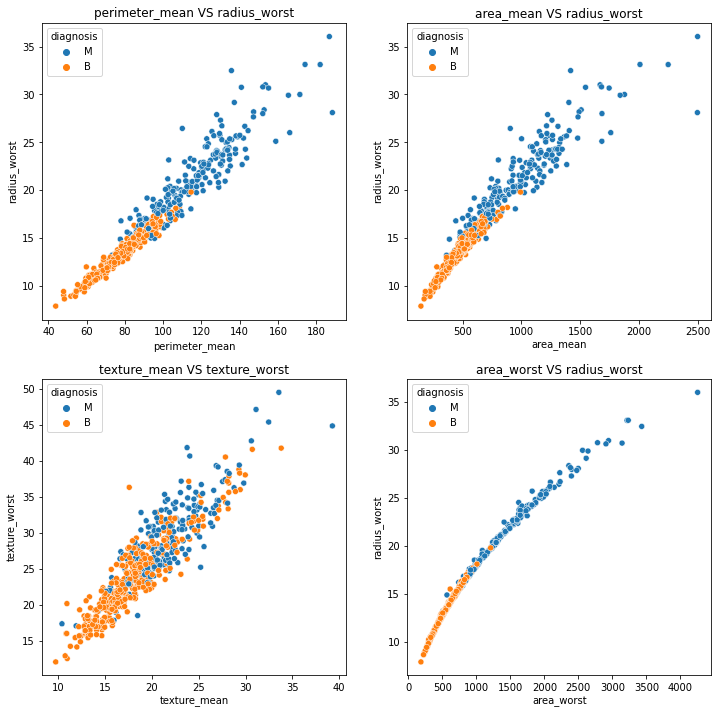

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plot_feat1_feat2('perimeter_mean','radius_worst')
plt.subplot(2, 2, 2)
plot_feat1_feat2('area_mean','radius_worst')
plt.subplot(2, 2, 3)
plot_feat1_feat2('texture_mean','texture_worst')
plt.subplot(2, 2, 4)
plot_feat1_feat2('area_worst','radius_worst')
plt.show()


## Negative Corelated Features

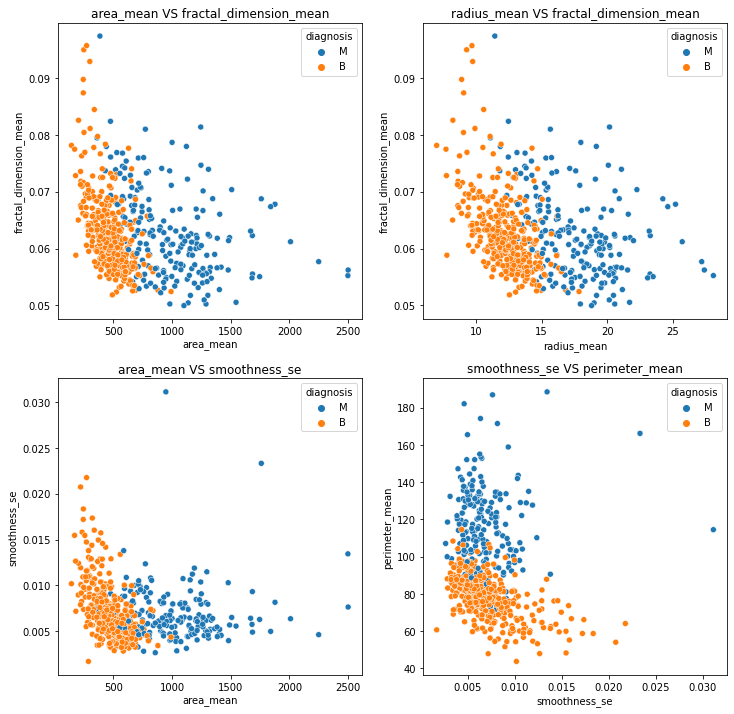

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plt.subplot(2, 2, 2)
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plt.subplot(2, 2, 3)
plot_feat1_feat2('area_mean','smoothness_se')
plt.subplot(2, 2, 4)
plot_feat1_feat2('smoothness_se','perimeter_mean')
plt.show()

## UnCorelated Features

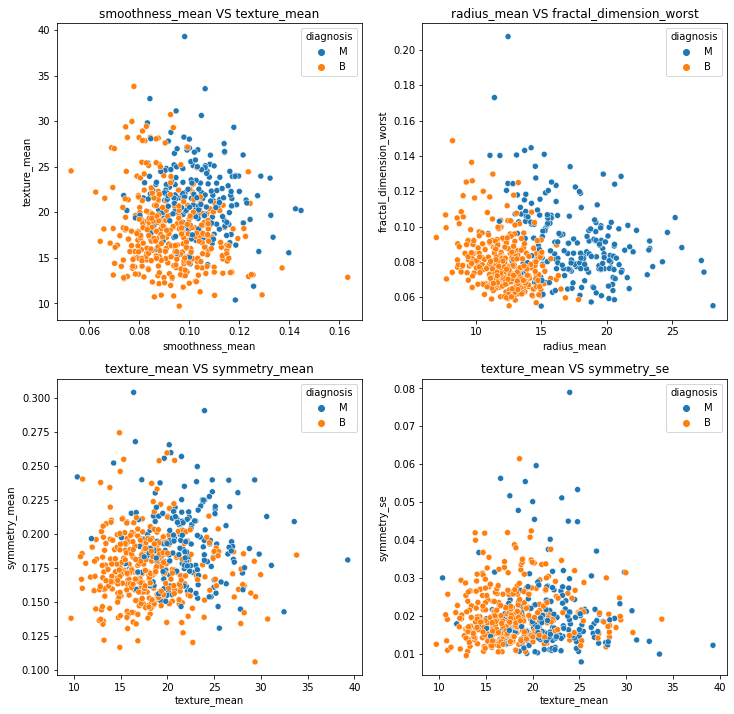

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plot_feat1_feat2('smoothness_mean','texture_mean')
plt.subplot(2, 2, 2)
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plt.subplot(2, 2, 3)
plot_feat1_feat2('texture_mean','symmetry_mean')
plt.subplot(2, 2, 4)
plot_feat1_feat2('texture_mean','symmetry_se')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
data.diagnosis = encoder.fit_transform(data.diagnosis)

In [20]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

## Train Test Split

**In this section we divide the data into train and test catagories.**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Creating Random Forest Classifier Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators = 200)

**The fit() method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning.**

In [29]:
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

## Predictions and Evaluations of RFC

In [30]:
rfc_prediction = rfc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 **Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.**

In [32]:
print('Accuracuy Score:\n')
print(accuracy_score(y_test, rfc_prediction))

Accuracuy Score:

0.9736842105263158


Confusion Matrix:

[[65  2]
 [ 1 46]]


<AxesSubplot:>

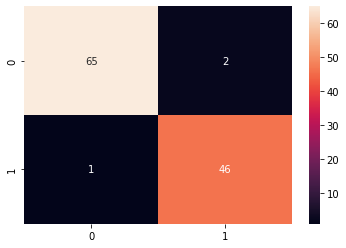

In [33]:
cm = confusion_matrix(y_test, rfc_prediction)

print('Confusion Matrix:\n')
print(cm)
sns.heatmap(cm,annot=True)

In [34]:
print('Classifition Report:\n')
print(classification_report(y_test, rfc_prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Train the Support Vector Classifier

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC()

In [37]:
svc.fit(X_train, y_train)

SVC()

## Predictions and Evaluations of SVC

In [38]:
svc_prediction = svc.predict(X_test)

In [39]:
print('Accuracuy Score:\n')
print(accuracy_score(y_test, svc_prediction))

Accuracuy Score:

0.9824561403508771


Confusion Matrix:

[[67  0]
 [ 2 45]]


<AxesSubplot:>

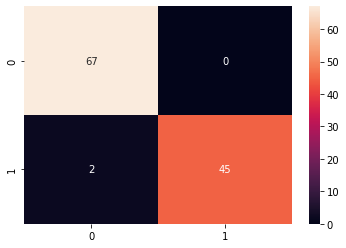

In [40]:
cm = confusion_matrix(y_test, svc_prediction)
print('Confusion Matrix:\n')
print(cm)
sns.heatmap(cm,annot=True)

In [41]:
print('Classifition Report:\n')
print(classification_report(y_test, svc_prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Creating LogisticRegression Model

In [42]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations of LogisticRegression

In [43]:
lg_prediction = LG.predict(X_test)

In [44]:
print('Accuracuy Score:\n')
print(accuracy_score(y_test, lg_prediction))

Accuracuy Score:

0.956140350877193


Confusion Matrix:

[[65  2]
 [ 3 44]]


<AxesSubplot:>

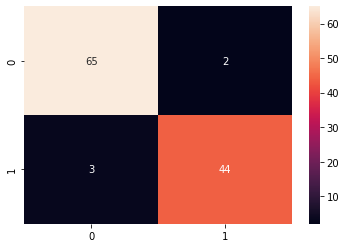

In [45]:
cm = confusion_matrix(y_test, lg_prediction)
print('Confusion Matrix:\n')
print(cm)
sns.heatmap(cm,annot=True)

In [46]:
print('Classifition Report:\n')
print(classification_report(y_test, lg_prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Creating DecisionTreeClassifier Model

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)


DecisionTreeClassifier()

## Predictions and Evaluations of DecisionTreeClassifier

In [48]:
dtree_prediction = dtree.predict(X_test)

In [49]:
print('Accuracuy Score:\n')
print(accuracy_score(y_test, dtree_prediction))

Accuracuy Score:

0.9385964912280702


Confusion Matrix:

[[63  4]
 [ 3 44]]


<AxesSubplot:>

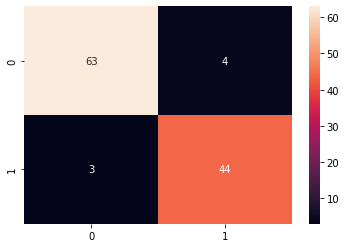

In [50]:
cm = confusion_matrix(y_test, dtree_prediction)

print('Confusion Matrix:\n')
print(cm)
sns.heatmap(cm,annot=True)

In [51]:
print('Classifition Report:\n')
print(classification_report(y_test, dtree_prediction))

Classifition Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



# Conclusion

In this case **Support Vector Classifier** achieve the best Accuracy with **98%** with respect to **Random Forest Classifier** which has **96%**, **LogisticRegression** which has **96%**, and **DecisionTreeClassifier** which has **95%**.